In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Input Data

In [24]:
#Input Datasets
df1 = pd.read_csv("/Users/genghua/Desktop/Courses/Python/Final/archive/Admission_Predict.csv")

In [25]:
# Look at the first five rows
df1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Cleaning

In [26]:

#Check null value
datac = df1.isnull().sum()
datac


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [27]:
# Dropping the 'Serial No.'
D = df1.drop('Serial No.', axis='columns')
D

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [28]:
#Rename the columns
df = D.rename(columns={'SOP': 'Statement of Purpose',
                       'CGPA': 'GPA',
                        'LOR ': 'Letter of Recommendation', 
                        'Chance of Admit ': 'Chance of Admit'})
df

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letter of Recommendation,GPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


# Data Analysis

In [29]:
#Mean, min and max for each variables
df.describe().loc[['mean', 'min', 'max']]

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letter of Recommendation,GPA,Research,Chance of Admit
mean,316.8075,107.41,3.0875,3.4,3.4525,8.598925,0.5475,0.72435
min,290.0000,92.00,1.0000,1.0,1.0000,6.800000,0.0000,0.34000
max,340.0000,120.00,5.0000,5.0,5.0000,9.920000,1.0000,0.97000


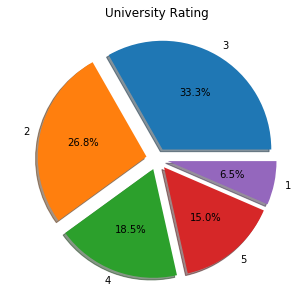

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
df['University Rating'].value_counts().plot.pie(explode = [0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%', shadow = True)
ax.set_title('University Rating')
ax.set_ylabel(' ')
plt.show()

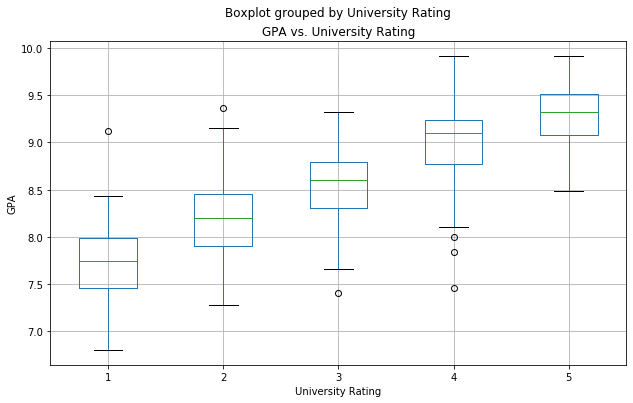

In [31]:
# Boxplot for GPA vs. University rating
df[['GPA', 'University Rating']].boxplot(by='University Rating', figsize=(10,6))
plt.title('GPA vs. University Rating')
plt.xlabel('University Rating')
plt.ylabel('GPA')
plt.show()

## Quesiton 1: What will increase the chances of admission?


## Question 2: Does the student who is academically good, also doing well in GRE and TOEFL?

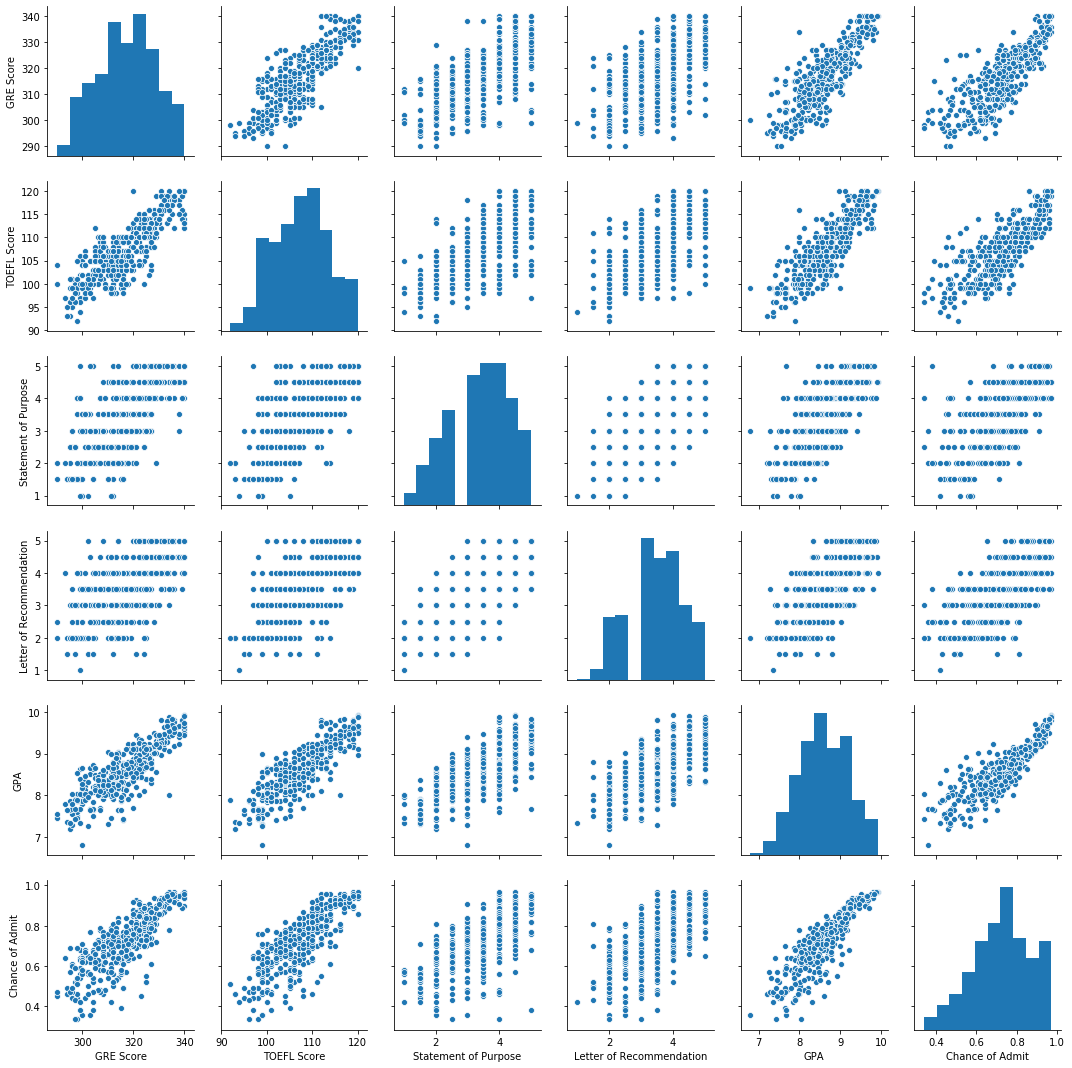

In [32]:
#Pair plot
sns.pairplot(data = df,vars=["GRE Score",
                           "TOEFL Score", 
                           #"University Rating",
                           "Statement of Purpose",
                           "Letter of Recommendation",
                            "GPA",
                            #"Research",
                            "Chance of Admit"])
plt.show()

## Question 3: Does research paper really having a good impact in admission?

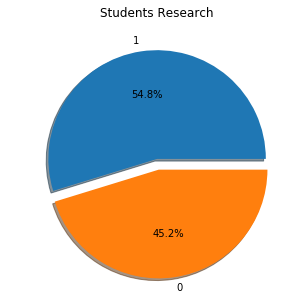

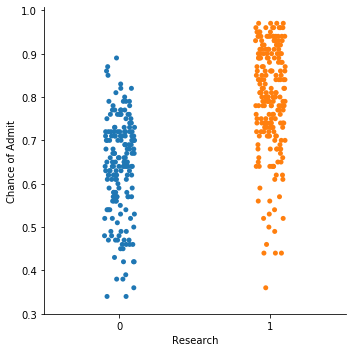

In [40]:
#Pie Chart to count the students who did the research paper.

fig, ax = plt.subplots(figsize=(5,5))
df['Research'].value_counts().plot.pie(explode = [0, 0.1],autopct='%1.1f%%', shadow = True)

ax.set_title('Students Research')
ax.set_ylabel(' ')
plt.show()

#categorical plot
sns.catplot(x= 'Research',y = 'Chance of Admit', data =df)
plt.show()

#Scatter plot(no need)

# fig, ax = plt.subplots()
# a = ax.scatter(df['Research'], 
#             df['Chance of Admit'])
# ax.set_xlabel("Research")
# ax.set_ylabel("Chance of Admit")
# plt.show()

## Question 4: Who applied to the top University?

In [34]:
# #Students who applied the top University rating 
df2= df[df['University Rating']== 5]
df2.describe().loc[['mean', 'min', 'max']]

,GRE Score,TOEFL Score,University Rating,Statement of Purpose,Letter of Recommendation,GPA,Research,Chance of Admit
mean,328.333333,113.666667,5.0,4.5,4.358333,9.291167,0.866667,0.888167
min,303.000000,103.000000,5.0,3.0,3.000000,8.480000,0.000000,0.610000
max,340.000000,120.000000,5.0,5.0,5.000000,9.910000,1.000000,0.970000


In [35]:
s = pd.Series([0.000001,0.000001,0.000001,0.000001], index = [1,1.5,2,2.5])
#Statement of Purpose
df3 = df2['Statement of Purpose'].value_counts().sort_index()
df4 = df3.append(s)
#Letter of Recommendation
df5 = df2['Letter of Recommendation'].value_counts().sort_index()
df6 = df5.append(s)


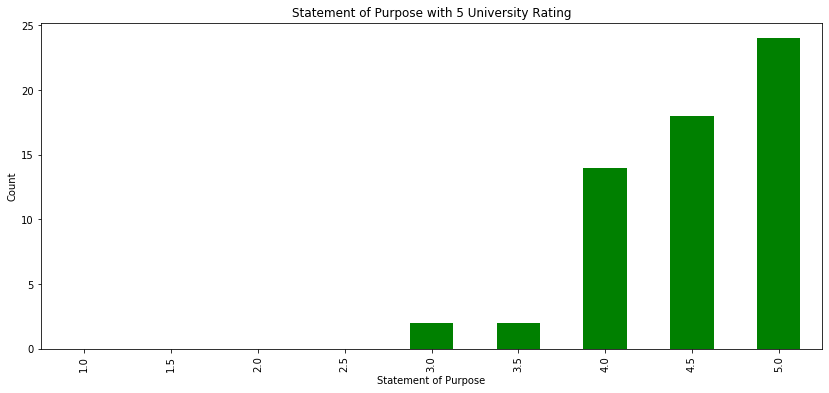

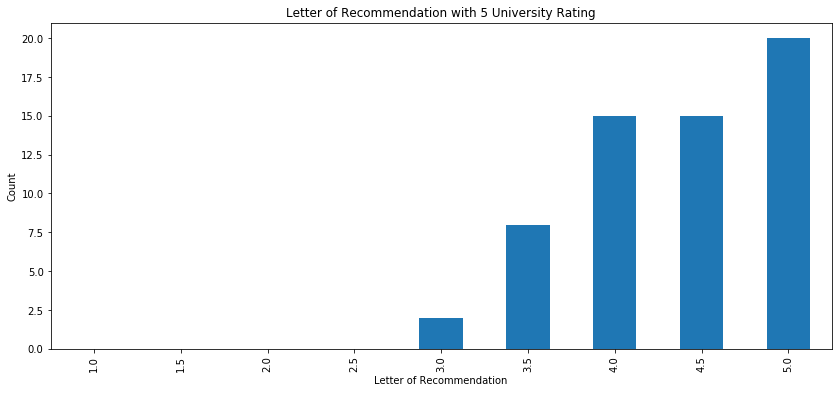

In [36]:

# Histogram for Statement of Purpose
df4.sort_index().plot(kind='bar',figsize=(14,6), color = 'g')
# plt.xlim =0
plt.title('Statement of Purpose with 5 University Rating')
plt.xlabel('Statement of Purpose')
plt.ylabel('Count')
plt.show()

# Histogram for Letter of Recommendation
df6.sort_index().plot(kind='bar', figsize=(14,6))

plt.title('Letter of Recommendation with 5 University Rating')
plt.xlabel('Letter of Recommendation')
plt.ylabel('Count')
plt.show()

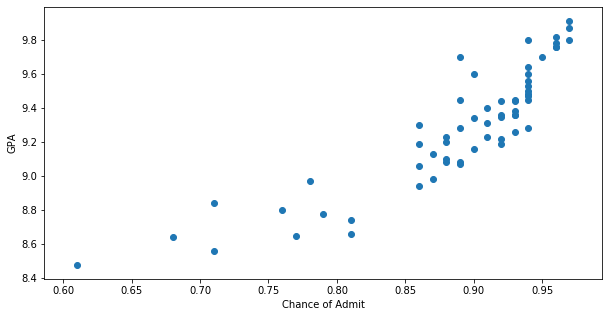

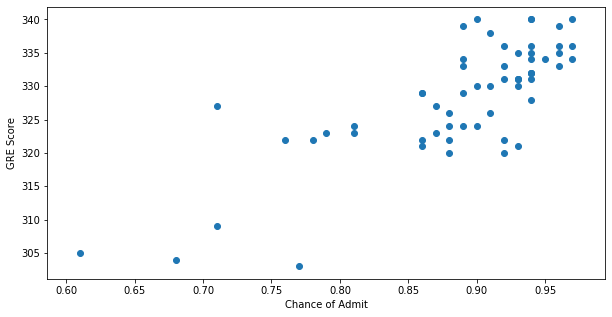

In [37]:

# GPA vs. Chance of Admit
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df2['Chance of Admit'], 
           df2['GPA'])
ax.set_xlabel("Chance of Admit")
ax.set_ylabel("GPA")
plt.show()


#GRE Score vs. Chance of Admit
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(df2['Chance of Admit'], 
           df2['GRE Score'])
ax.set_xlabel("Chance of Admit")
ax.set_ylabel("GRE Score")
plt.show()

# Conclusion

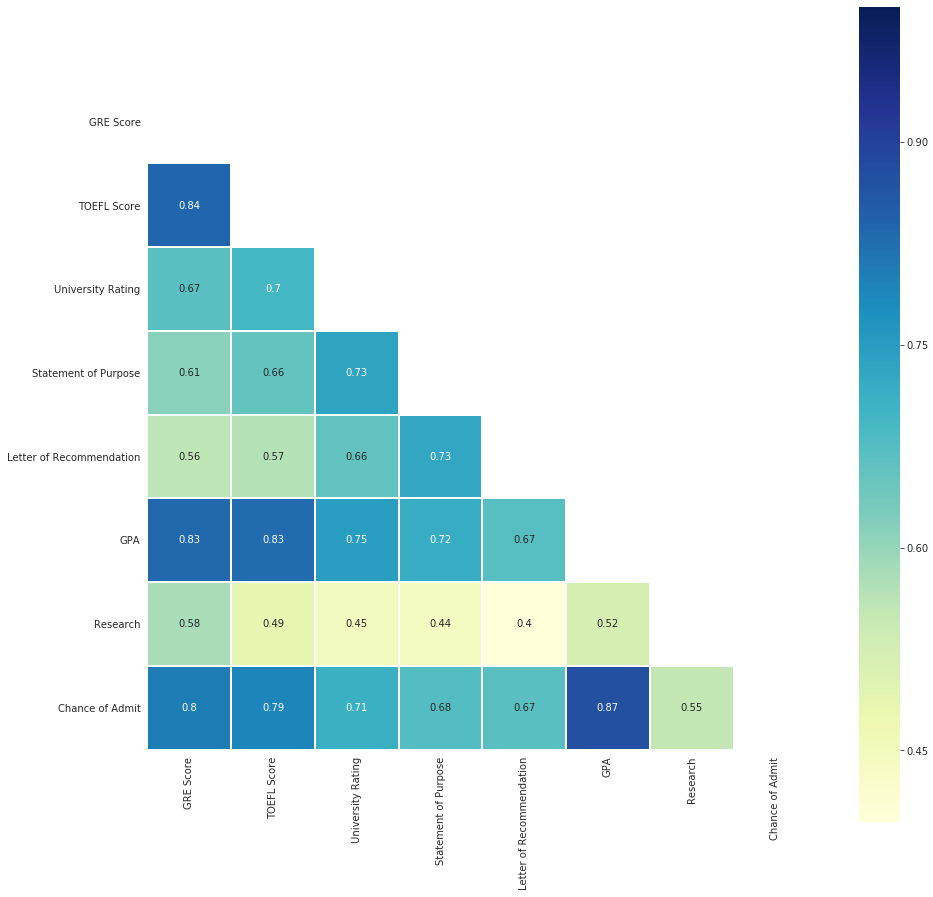

In [38]:
# corr = df1.corr()
# corr

# Example
# >>> corr = np.corrcoef(np.random.randn(10, 200))
# >>> mask = np.zeros_like(corr)
# >>> mask[np.triu_indices_from(mask)] = True
# >>> with sns.axes_style("white"):
# ...     f, ax = plt.subplots(figsize=(7, 5))
# ...     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True, annot=True,linewidths=.8,cmap="YlGnBu")
    
#Last row cut in half of heatmap plot
    ax.set_ylim(8,0)